# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [4]:
!pip install numpy
%pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Import the core data science libraries:

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display, Image, Markdown

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [6]:
df = pd.read_csv("data/hotelsMotels.csv")

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

## Show 5 rows

In [7]:
df.sample(5)

,the_geom,OBJECTID,BusinessAddress,BusinessName,BusinessStartDate,BusinessType,City,LocationX,LocationY,State,Suite,Zip
95,POINT (-90.074643014889 29.974160125824),107,2257 BAYOU RD,BENACHI HOUSE,2017-05-18,4703 - BED & BREAKFAST INNS,NEW ORLEANS,3.679346e+06,538282.219913,LA,NaN,70119
277,POINT (-90.089447647193 29.956286201868),159,2222 POYDRAS ST,DA EMPIRE,2024-01-30,4701 - HOTELS (EXC CASINO HOTELS) & MOTELS,NEW ORLEANS,3.674729e+06,531731.397187,LA,NaN,70119
56,POINT (-90.075243150609 29.97358462261),315,2306 ESPLANADE AVE,DEGAS HOUSE,2021-09-30,4701 - HOTELS (EXC CASINO HOTELS) & MOTELS,NEW ORLEANS,3.679158e+06,538070.858377,LA,NaN,70119
11,POINT (-90.065547194647 29.956227745827),279,621 ST LOUIS ST,ROYAL ORLEANS HOTEL,1987-12-01,4701 - HOTELS (EXC CASINO HOTELS) & MOTELS,NEW ORLEANS,3.682298e+06,531793.086915,LA,NaN,70130
111,POINT (-90.067321926293 29.951344003058),329,114 MAGAZINE ST,BEST WEST ST CHRIS HOTEL,2004-06-22,4701 - HOTELS (EXC CASINO HOTELS) & MOTELS,NEW ORLEANS,3.681755e+06,530010.965505,LA,NaN,70130


## Show each column name and data type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   the_geom           381 non-null    object 
 1   OBJECTID           381 non-null    int64  
 2   BusinessAddress    381 non-null    object 
 3   BusinessName       381 non-null    object 
 4   BusinessStartDate  381 non-null    object 
 5   BusinessType       381 non-null    object 
 6   City               381 non-null    object 
 7   LocationX          381 non-null    float64
 8   LocationY          381 non-null    float64
 9   State              381 non-null    object 
 10  Suite              11 non-null     object 
 11  Zip                381 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 35.8+ KB


## Show Unique Feature  
There are 

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

In [9]:
import csv

## Define some functions that will be used to munge the data

### 1. Identify fields we don't want and 'mark' them for further processing

In [10]:
def identify_unneccessary_fields(data_set,list_of_unwanted_fields):
    ''' 
    Takes a list of dictionaries, where each dictionary item is a record in a dataset
    AND a list of the 'unwanted' fields as Strings
    Identifies the values, in the data set, for those fields in each record and replaces them with a marker
    Returns the modified dataset with "---" as the value in each record for the given fields
    '''
    for record in data_set.copy(): #iterate through shallow copy so changes can be made to the size of the actual object without raising an error
        for field,value in record.items():
            if field in list_of_unwanted_fields:
                record[field] = "---"

### 2. Remove all fields previously 'marked'

In [11]:
def remove_unneccessary_fields(data_set):
    '''
    Takes a list of dictionaries, i.e. dataset
    Deletes all entries previously 'marked'
    '''
    for record in data_set:
        for field,value in (record.copy()).items():
            if value == "---": #now remove all uneccessary fields
                del record[field]
    return data_set

### 3. Remove any commas for a record's string value in a given field. Unexpected commas in one datacell will be treated as a new data field when parsed into a CSV file.

In [12]:
def remove_commas(data_set,field):
    for record in data_set:
        value = record[field]
        if "," in value:
            record[field] = value.replace(",","")

### 3. 'Clean' up the data, i.e. make it more presentable for later analysis

In [13]:
def clean_up(data_set,field):
    ''' 
    Takes a dataset and converts the values for the given field to Title Case 
    '''
    for record in data_set:
        record[field] = str.title(record[field])
    return data_set

### Example . . .

In [14]:
my_dataset = [
    {"field 1":"hello world","field 2":2,"field 3":True},
    {"field 1":"a string value","field 2":2,"field 3":False}
]
my_cleaned_dataset = clean_up(my_dataset,"field 1")
my_cleaned_dataset[0]["field 1"]

'Hello World'

### 4. The final stage for munging this dataset; performs operations that are entirely unique/relevant to this data set.

In [15]:
def perform_munging_unique_to_dataset(all_data):
    ''' 
    'Cleans' the values in the "BusinessType" fields
    '''
    for record in all_data:
        for field,value in (record.copy()).items():
            if field == "BusinessType":
                #criteria
                if value.startswith("880"):
                    record[field] = "Bed & Breakfast 1 to 5 rooms"
                elif value.startswith("4704"):
                    record[field] = "Traveler Accomodation"
                else:
                    record[field] = value[7:]#slice-out the number prefix                
    return(all_data)

## The main program

### Open the CSV file 'hotelsMotels.csv'

In [16]:
with open("data/hotelsMotels.csv","r") as file:
    all_data = list(csv.DictReader(file))
all_data[:5]

[{'the_geom': 'POINT (-90.071030376898 29.95488864286)',
  'OBJECTID': '124',
  'BusinessAddress': '921 CANAL ST',
  'BusinessName': 'THE RITZ CARLTON HOTEL CO LLC',
  'BusinessStartDate': '2000-10-01',
  'BusinessType': '4701 - HOTELS (EXC CASINO HOTELS) & MOTELS',
  'City': 'NEW ORLEANS',
  'LocationX': '3680566.91771',
  'LocationY': '531286.97037',
  'State': 'LA',
  'Suite': '',
  'Zip': '70112'},
 {'the_geom': 'POINT (-90.073969129731 29.971202236413)',
  'OBJECTID': '377',
  'BusinessAddress': '1210 N GALVEZ ST',
  'BusinessName': 'ACCESSORY B&B',
  'BusinessStartDate': '2023-07-25',
  'BusinessType': '4703 - BED & BREAKFAST INNS',
  'City': 'NEW ORLEANS',
  'LocationX': '3679571.14485',
  'LocationY': '537208.9634',
  'State': 'LA',
  'Suite': '',
  'Zip': '70116'},
 {'the_geom': 'POINT (-90.074462750216 29.940925532513)',
  'OBJECTID': '26',
  'BusinessAddress': '1225 ST CHARLES AVE',
  'BusinessName': 'THE QUISBY',
  'BusinessStartDate': '2016-11-17',
  'BusinessType': '4701 

### Munging Stage - 1

In [17]:
identify_unneccessary_fields(all_data,["the_geom","City","Suite","Location"])
all_data[:5]

[{'the_geom': '---',
  'OBJECTID': '124',
  'BusinessAddress': '921 CANAL ST',
  'BusinessName': 'THE RITZ CARLTON HOTEL CO LLC',
  'BusinessStartDate': '2000-10-01',
  'BusinessType': '4701 - HOTELS (EXC CASINO HOTELS) & MOTELS',
  'City': '---',
  'LocationX': '3680566.91771',
  'LocationY': '531286.97037',
  'State': 'LA',
  'Suite': '---',
  'Zip': '70112'},
 {'the_geom': '---',
  'OBJECTID': '377',
  'BusinessAddress': '1210 N GALVEZ ST',
  'BusinessName': 'ACCESSORY B&B',
  'BusinessStartDate': '2023-07-25',
  'BusinessType': '4703 - BED & BREAKFAST INNS',
  'City': '---',
  'LocationX': '3679571.14485',
  'LocationY': '537208.9634',
  'State': 'LA',
  'Suite': '---',
  'Zip': '70116'},
 {'the_geom': '---',
  'OBJECTID': '26',
  'BusinessAddress': '1225 ST CHARLES AVE',
  'BusinessName': 'THE QUISBY',
  'BusinessStartDate': '2016-11-17',
  'BusinessType': '4701 - HOTELS (EXC CASINO HOTELS) & MOTELS',
  'City': '---',
  'LocationX': '3679535.82018',
  'LocationY': '526197.515134',

### Munging Stage - 2

In [18]:
remove_unneccessary_fields(all_data)
all_data[:5]

[{'OBJECTID': '124',
  'BusinessAddress': '921 CANAL ST',
  'BusinessName': 'THE RITZ CARLTON HOTEL CO LLC',
  'BusinessStartDate': '2000-10-01',
  'BusinessType': '4701 - HOTELS (EXC CASINO HOTELS) & MOTELS',
  'LocationX': '3680566.91771',
  'LocationY': '531286.97037',
  'State': 'LA',
  'Zip': '70112'},
 {'OBJECTID': '377',
  'BusinessAddress': '1210 N GALVEZ ST',
  'BusinessName': 'ACCESSORY B&B',
  'BusinessStartDate': '2023-07-25',
  'BusinessType': '4703 - BED & BREAKFAST INNS',
  'LocationX': '3679571.14485',
  'LocationY': '537208.9634',
  'State': 'LA',
  'Zip': '70116'},
 {'OBJECTID': '26',
  'BusinessAddress': '1225 ST CHARLES AVE',
  'BusinessName': 'THE QUISBY',
  'BusinessStartDate': '2016-11-17',
  'BusinessType': '4701 - HOTELS (EXC CASINO HOTELS) & MOTELS',
  'LocationX': '3679535.82018',
  'LocationY': '526197.515134',
  'State': 'LA',
  'Zip': '70130'},
 {'OBJECTID': '158',
  'BusinessAddress': '1724 MARAIS ST',
  'BusinessName': 'L’AUBERGE PLACAGE',
  'BusinessSta

### Munging Stage - 3

In [19]:
print(all_data[9]["BusinessName"])
remove_commas(all_data,"BusinessName")
all_data[9]

COUNTRY INN & SUITES,NEW ORLEANS I-10 EAST


{'OBJECTID': '67',
 'BusinessAddress': '5801 READ BLVD',
 'BusinessName': 'COUNTRY INN & SUITESNEW ORLEANS I-10 EAST',
 'BusinessStartDate': '2019-02-15',
 'BusinessType': '4701 - HOTELS (EXC CASINO HOTELS) & MOTELS',
 'LocationX': '3711130.32971',
 'LocationY': '560962.831134',
 'State': 'LA',
 'Zip': '70127'}

### Munging Stage - 3

In [20]:
clean_up(all_data,"BusinessAddress")
all_data[:5]

[{'OBJECTID': '124',
  'BusinessAddress': '921 Canal St',
  'BusinessName': 'THE RITZ CARLTON HOTEL CO LLC',
  'BusinessStartDate': '2000-10-01',
  'BusinessType': '4701 - HOTELS (EXC CASINO HOTELS) & MOTELS',
  'LocationX': '3680566.91771',
  'LocationY': '531286.97037',
  'State': 'LA',
  'Zip': '70112'},
 {'OBJECTID': '377',
  'BusinessAddress': '1210 N Galvez St',
  'BusinessName': 'ACCESSORY B&B',
  'BusinessStartDate': '2023-07-25',
  'BusinessType': '4703 - BED & BREAKFAST INNS',
  'LocationX': '3679571.14485',
  'LocationY': '537208.9634',
  'State': 'LA',
  'Zip': '70116'},
 {'OBJECTID': '26',
  'BusinessAddress': '1225 St Charles Ave',
  'BusinessName': 'THE QUISBY',
  'BusinessStartDate': '2016-11-17',
  'BusinessType': '4701 - HOTELS (EXC CASINO HOTELS) & MOTELS',
  'LocationX': '3679535.82018',
  'LocationY': '526197.515134',
  'State': 'LA',
  'Zip': '70130'},
 {'OBJECTID': '158',
  'BusinessAddress': '1724 Marais St',
  'BusinessName': 'L’AUBERGE PLACAGE',
  'BusinessSta

### Munging Stage - 4

In [21]:
cleaned_data = perform_munging_unique_to_dataset(all_data) 
cleaned_data[:5]

[{'OBJECTID': '124',
  'BusinessAddress': '921 Canal St',
  'BusinessName': 'THE RITZ CARLTON HOTEL CO LLC',
  'BusinessStartDate': '2000-10-01',
  'BusinessType': 'HOTELS (EXC CASINO HOTELS) & MOTELS',
  'LocationX': '3680566.91771',
  'LocationY': '531286.97037',
  'State': 'LA',
  'Zip': '70112'},
 {'OBJECTID': '377',
  'BusinessAddress': '1210 N Galvez St',
  'BusinessName': 'ACCESSORY B&B',
  'BusinessStartDate': '2023-07-25',
  'BusinessType': 'BED & BREAKFAST INNS',
  'LocationX': '3679571.14485',
  'LocationY': '537208.9634',
  'State': 'LA',
  'Zip': '70116'},
 {'OBJECTID': '26',
  'BusinessAddress': '1225 St Charles Ave',
  'BusinessName': 'THE QUISBY',
  'BusinessStartDate': '2016-11-17',
  'BusinessType': 'HOTELS (EXC CASINO HOTELS) & MOTELS',
  'LocationX': '3679535.82018',
  'LocationY': '526197.515134',
  'State': 'LA',
  'Zip': '70130'},
 {'OBJECTID': '158',
  'BusinessAddress': '1724 Marais St',
  'BusinessName': 'L’AUBERGE PLACAGE',
  'BusinessStartDate': '2023-12-07'

## Creating a new 'cleaned' file for the data

### Inserting the first line (i.e. headers) and all records into the new CSV file

In [22]:
with open("data/hotelsMotels_clean.csv", "w") as output:
    headers = "" #first line
    for (index,key) in enumerate(list(all_data[1].keys())):
        if index == len(list(all_data[1].keys()))-1:
            headers += (str(key)+"\n")
        else:
            headers += (str(key)+",")
    output.write(headers)
    
    line = ""
    for row in all_data:##fix
        #create a list of all data for each field (of each row) that will dynamically change for each row
        data = list(row.values())
        for (index,value) in enumerate(data):
            if index == len(list(row.values()))-1:
                if value == '': #if there are any fields with an empty String for a value, set that value to "---" so empty values can be parsed correctly when writing to the CSV file
                    line += "---" + "\n"
                else:   
                    line += value + "\n"
            else:
                if value == '':
                    line += "---" + ","
                else:
                    line += value + ","
        output.write(line)
        line = ""

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

In [23]:
cleaned_df = pd.read_csv("data/hotelsMotels_clean.csv")
cleaned_df.describe()

,OBJECTID,LocationX,LocationY
count,381.000000,3.810000e+02,381.000000
mean,191.000000,3.682118e+06,532372.770436
std,110.129469,6.808601e+03,7105.052251
min,1.000000,3.663297e+06,519724.881272
25%,96.000000,3.679333e+06,529321.569345
50%,191.000000,3.681355e+06,531225.766210
75%,286.000000,3.683387e+06,535097.164806
max,381.000000,3.726825e+06,565770.890339


## Types of Businesses in this Dataset 

In [24]:
cleaned_df["BusinessType"].describe()

count                                     381
unique                                      6
top       HOTELS (EXC CASINO HOTELS) & MOTELS
freq                                      253
Name: BusinessType, dtype: object

In [25]:
cleaned_df["BusinessType"].value_counts()

BusinessType
HOTELS (EXC CASINO HOTELS) & MOTELS    253
BED & BREAKFAST INNS                    99
Bed & Breakfast 1 to 5 rooms            14
ROOMING & BOARDING HOUSES               11
Traveler Accomodation                    3
CASINO HOTELS                            1
Name: count, dtype: int64

In [26]:
cleaned_df["BusinessType"].value_counts().max() * ( 100/381)

66.40419947506561

The 'BusinessType' with the most amount of entries in this dataset is 'HOTELS (EXC CASINO HOTELS) & MOTELS', accounting for 253 out of the 381 total entries, or 66.40%.

In [27]:
cleaned_df[ cleaned_df["BusinessType"] == 'HOTELS (EXC CASINO HOTELS) & MOTELS'][ ['BusinessAddress','BusinessName','BusinessStartDate','BusinessType'] ].sample(5)

,BusinessAddress,BusinessName,BusinessStartDate,BusinessType
61,2727 St Charles Ave,THE GRAND VICTORIAN BED & BREAKFAST,1998-10-01,HOTELS (EXC CASINO HOTELS) & MOTELS
251,2222 Burgundy St,MAISON GRACE,2019-03-27,HOTELS (EXC CASINO HOTELS) & MOTELS
123,1430 St Charles Ave,SONDER USA,2021-11-29,HOTELS (EXC CASINO HOTELS) & MOTELS
195,4180 Old Gentilly Road,DAYS INN,2021-11-10,HOTELS (EXC CASINO HOTELS) & MOTELS
300,623 Canal St,SONDER USA,2021-04-06,HOTELS (EXC CASINO HOTELS) & MOTELS


## Let's take a look at the only 'Casino Hotel' in this dataset

In [28]:
cleaned_df[cleaned_df["BusinessType"] == 'CASINO HOTELS']

,OBJECTID,BusinessAddress,BusinessName,BusinessStartDate,BusinessType,LocationX,LocationY,State,Zip
170,290,228 Poydras St,HARRAH'S POYDRAS HOTEL,2006-09-17,CASINO HOTELS,3.682272e+06,528907.947328,LA,70130


Notice there are only 366 results for unique names within this dataset which contains 381 records. This means that different instances of the Hotel/motel's entity are related. A hotel chain may have several different locations, or two different bussinesses may have the same name with no inherent connections. In order to ascertain whether or not different instances/bussinesses are related, it is useful to see the data in the other fields, such as 'BusinessType'. Perhaps if different businesses have the same name and type, they most likely belong to a chain. The value_counts() query above returns all unique values for the 'BusinessName' field, along with the number of instances. 'SEXTAINT STAYS' is the most numerous value, with a total of 5 instances in this dataset. To do some further investigation, let's see the different locations for SEXTANT STAYS.     

In [29]:
cleaned_df[ cleaned_df['BusinessName'] == 'SEXTANT STAYS'][ ['BusinessAddress','BusinessName','BusinessType'] ]

,BusinessAddress,BusinessName,BusinessType
18,1148 S Peters St,SEXTANT STAYS,HOTELS (EXC CASINO HOTELS) & MOTELS
25,822 Perdido St,SEXTANT STAYS,HOTELS (EXC CASINO HOTELS) & MOTELS
141,822 Howard Ave,SEXTANT STAYS,HOTELS (EXC CASINO HOTELS) & MOTELS
236,127 Carondelet St,SEXTANT STAYS,HOTELS (EXC CASINO HOTELS) & MOTELS
319,1148 S Peters St,SEXTANT STAYS,HOTELS (EXC CASINO HOTELS) & MOTELS


## Addresses

In [30]:
cleaned_df['BusinessAddress'].value_counts()

BusinessAddress
1201 Convention Center Blvd    2
7418 Chef Menteur Hwy          2
3626 St Charles Ave            2
519 Frenchmen St               2
315 Magazine St                2
                              ..
1800 Canal St                  1
P.O. Box 24127 St              1
1430 St Charles Ave            1
717 Barracks St                1
2110 Marais St                 1
Name: count, Length: 364, dtype: int64

According to the above query, which returns all unique values under the 'BusinessAddress' field, some records show the same value for the 'BusinessAddress' field, which begs the question, how do two different businesses share the same address? Let's take a look at the first result, '1201 Convention Center Blvd', and analyze the two records which show this value in the 'BusinessAddress' field. If these two records have more values in common accross other fields, then this may point to a potential error in the dataset. Let's see.

In [31]:
cleaned_df[ cleaned_df['BusinessAddress'] == '1201 Convention Center Blvd'][ ['BusinessAddress','BusinessName','BusinessType','BusinessStartDate'] ]

,BusinessAddress,BusinessName,BusinessType,BusinessStartDate
139,1201 Convention Center Blvd,HAMPTON INN & SUITES NEW ORLEANS-CONVENTION CE...,HOTELS (EXC CASINO HOTELS) & MOTELS,2020-04-24
371,1201 Convention Center Blvd,HAMPTON INN & SUITES NEW ORLEANS-CONVENTION CE...,HOTELS (EXC CASINO HOTELS) & MOTELS,2020-10-26


Interestingly, the two records with this same address overlap across multiple fields except for 'BusinessStartDate'. The 'BusinessName' and 'BusinessType' are exactly the same; however, according to the data, they are two different businesses that started up at different times. Most likely this is an error because this data set only contains records for Hotels/motels in the state of Lousiana. To confirm this conjecture, let's check to see if the longitude/lattitude values are the same;

In [32]:
cleaned_df[ cleaned_df['BusinessAddress'] == '1201 Convention Center Blvd'][ ['BusinessAddress','LocationX','LocationY'] ]

,BusinessAddress,LocationX,LocationY
139,1201 Convention Center Blvd,3.682617e+06,525900.845757
371,1201 Convention Center Blvd,3.682617e+06,525900.845757


... and yes they are, which most likely means this was an error.

## Let's see which business is the oldest in this dataset

In [70]:
oldest_business = cleaned_df[ cleaned_df['BusinessStartDate'] == cleaned_df['BusinessStartDate'].min()][ ['BusinessAddress','BusinessName','BusinessType','BusinessStartDate'] ]
oldest_business

,BusinessAddress,BusinessName,BusinessType,BusinessStartDate
146,214 Royal St,MONTELEONE HOTEL,HOTELS (EXC CASINO HOTELS) & MOTELS,1968-01-01


... and the result is 'MONTELEONE HOTEL' which started in 1968.

In [34]:
cleaned_df[ cleaned_df['BusinessStartDate'] == cleaned_df['BusinessStartDate'].max()][ ['BusinessAddress','BusinessName','BusinessType','BusinessStartDate'] ]

,BusinessAddress,BusinessName,BusinessType,BusinessStartDate
97,222 Loyola Ave,222 LOYOLA TENANT,HOTELS (EXC CASINO HOTELS) & MOTELS,2024-04-03


whereas the most recently started business is '222 LOYOLA TENANT' which started up, as of this writing, at the beginning of this month.

## Let's see how many businesses started up BEFORE and AFTER the start of the century

In [35]:
all_dates = cleaned_df['BusinessStartDate']
all_dates_before_2000 = [(int(date[:4]) < 2000) for date in all_dates]
all_dates[ all_dates_before_2000 ]

all_dates_after_2000 = [(int(date[:4]) >= 2000) for date in all_dates]

"Before 2000: ",cleaned_df[ all_dates_before_2000 ].shape[0]," After 2000: ",cleaned_df[ all_dates_after_2000 ].shape[0]



('Before 2000: ', 51, ' After 2000: ', 330)

Accordingly, only 51 out of the total 381 entries for businesses were started up before the turn of the century (i.e. 2000). 

## Show all 'Hotels (Exc Casino Hotels) & Motels' by order of Start Date in ascending order

In [36]:
cleaned_df[ cleaned_df['BusinessType'] == 'HOTELS (EXC CASINO HOTELS) & MOTELS'].sort_values(by='BusinessStartDate', ascending=True).set_index('BusinessStartDate')

,OBJECTID,BusinessAddress,BusinessName,BusinessType,LocationX,LocationY,State,Zip
BusinessStartDate,,,,,,,,
1968-01-01,278,214 Royal St,MONTELEONE HOTEL,HOTELS (EXC CASINO HOTELS) & MOTELS,3.681611e+06,531183.872066,LA,70130
1968-04-01,76,330 Loyola Ave,HOLIDAY INN DTN SUPERDOME HTM,HOTELS (EXC CASINO HOTELS) & MOTELS,3.679295e+06,530648.055362,LA,70112
1974-01-01,113,320 Decatur St,BIENVILLE HOUSE MOTOR HOTEL,HOTELS (EXC CASINO HOTELS) & MOTELS,3.682413e+06,530959.820226,LA,70130
1979-01-15,77,301 Dauphine St,CHATEAU LEMOYNE ATTN: FINANCE DEPT:,HOTELS (EXC CASINO HOTELS) & MOTELS,3.681072e+06,531801.477827,LA,70112
1981-01-01,320,920 N Rampart St,BEST WESTERN FRENCH QUARTER LANDMARK HOTEL,HOTELS (EXC CASINO HOTELS) & MOTELS,3.682008e+06,534059.252613,LA,70116
...,...,...,...,...,...,...,...,...
2024-01-02,268,104 St Charles Ave,THE RUBENSTEIN HOTEL,HOTELS (EXC CASINO HOTELS) & MOTELS,3.681126e+06,530513.066306,LA,70130
2024-01-05,151,747 St Charles Ave,LITTLE LAGNIAPPE HOTEL LLC,HOTELS (EXC CASINO HOTELS) & MOTELS,3.680394e+06,528213.912448,LA,70130
2024-01-30,159,2222 Poydras St,DA EMPIRE,HOTELS (EXC CASINO HOTELS) & MOTELS,3.674729e+06,531731.397187,LA,70119


In [37]:
cleaned_df[ cleaned_df['BusinessType'] == 'BED & BREAKFAST INNS'].sort_values(by='BusinessStartDate', ascending=True).set_index('BusinessStartDate')

,OBJECTID,BusinessAddress,BusinessName,BusinessType,LocationX,LocationY,State,Zip
BusinessStartDate,,,,,,,,
1981-06-15,78,1748 Prytania St,ST CHARLES GUEST HOUSE,BED & BREAKFAST INNS,3.679125e+06,524346.630908,LA,70130
1995-02-22,283,2020 Burgundy St,SUN OAK MUSEUM AND GUEST HOUSE,BED & BREAKFAST INNS,3.684488e+06,535509.685382,LA,70116
1995-09-19,87,1146 Constantinople St,CHIMES BED & BREAKFAST (THE),BED & BREAKFAST INNS,3.672389e+06,519896.428664,LA,70115
1996-11-15,121,2316 Dauphine St,LA DAUPHINE,BED & BREAKFAST INNS,3.685647e+06,535191.644550,LA,70117
1998-01-07,4,1303 Governor Nicholls St,MONROSE ROW B & B,BED & BREAKFAST INNS,3.681927e+06,535360.707078,LA,70116
...,...,...,...,...,...,...,...,...
2023-07-25,377,1210 N Galvez St,ACCESSORY B&B,BED & BREAKFAST INNS,3.679571e+06,537208.963400,LA,70116
2023-08-18,273,1212 Magazine St,1501 ORETHA CASTLE HALEY BLVD LLC,BED & BREAKFAST INNS,3.680644e+06,525483.642749,LA,70130
2023-08-23,378,917 N Villere St,PAUL COUGHLIN,BED & BREAKFAST INNS,3.680779e+06,534922.715462,LA,70116


## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

## 1. Bar chart for all occurences of each value in the 'BusinessType' field

([<matplotlib.patches.Wedge at 0x137dcfcb0>,
 [Text(0.7533984502991984, 0.8014928415692598, 'Hot. & Mot.'),
  Text(-0.19398971047180188, 1.0827594341454922, 'B & B Inns'),
  Text(-0.32608742087229486, 1.0505555644271534, 'Trav. Accom.'),
  Text(-0.7467640932940232, -0.8076777754567446, 'R & B Houses'),
  Text(1.0892105521907591, -0.15368920910819237, 'B & B 1-5 rooms'),
  Text(1.0996634623440522, -0.027207895646138753, 'Casino Hot.')])

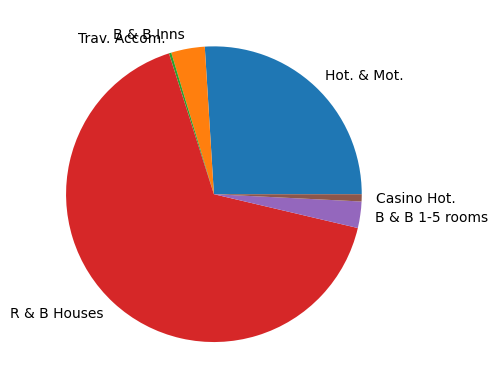

In [68]:
cleaned_df.groupby("BusinessType")['BusinessType'].count()
labels = 'Hot. & Mot.','B & B Inns','Trav. Accom.','R & B Houses','B & B 1-5 rooms','Casino Hot.'
percentage = [percent for percent in (cleaned_df.groupby("BusinessType")['BusinessType'].count())]

fig, ax = plt.subplots()
ax.pie(percentage, labels=labels)


## 2. A line plot with all businesses for every decade

In [72]:
oldest_business

,BusinessAddress,BusinessName,BusinessType,BusinessStartDate
146,214 Royal St,MONTELEONE HOTEL,HOTELS (EXC CASINO HOTELS) & MOTELS,1968-01-01


As we know from previous queries, the records for this dataset begin from the year 1968, which means this covers roughly 5 decades.

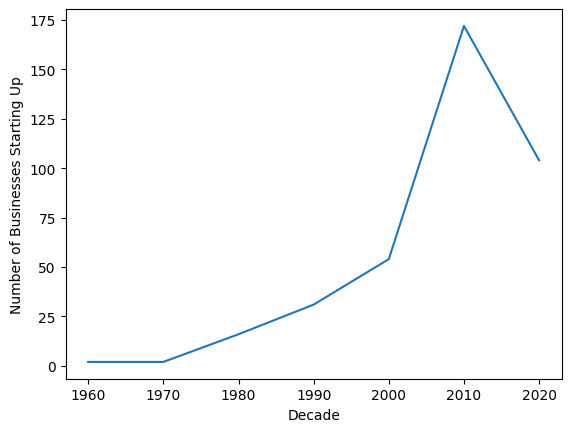

In [148]:
decade = 1970
subsets_for_each_decade = []
for i in range(7):
    subsets_for_each_decade += [ [ int(date[:4]) >= (decade-10) and int(date[:4]) < decade for date in all_dates] ]
    #print([(int(date[:4]) < decade) for date in all_dates])
    #print(decade)
    decade += 10
y = []
x = ['1960','1970','1980','1990','2000','2010','2020']
for subset in subsets_for_each_decade:
    y += [subset.count(True)]

plt.xlabel('Decade')
plt.ylabel('Number of Businesses Starting Up')
plt.plot(x,y)


This graph shows that the decade of 2010-2020 was when the most amount of businesses started up.

## 3. 

<BarContainer object of 2 artists>

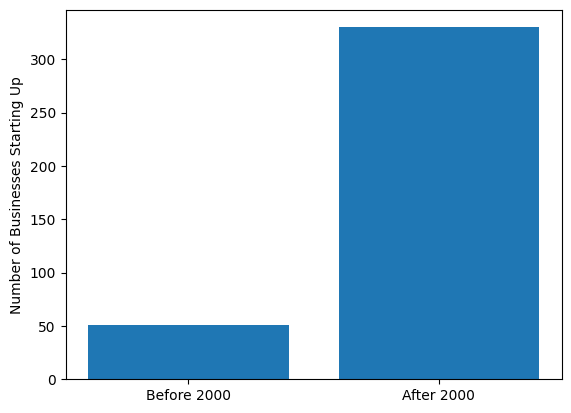

In [152]:
y = [all_dates_before_2000.count(True),all_dates_after_2000.count(True)]
x = ['Before 2000','After 2000']
plt.ylabel('Number of Businesses Starting Up')
plt.bar(x,y)

